![](./resources/images/header_logo.png)

# Chapter 3 Understanding word vectors

This chapter will reason about how computers understand plain text. 

We already know that we use language model to analyse texts. What do machines need to understand the meaning behind particular words, sentences or even whole text documents?

The answer is Math, namely vectors.

## Word vectors
Each word is usually represented as a **vector** or if you prefer a matrix of numbers. We call these **word vectors**  or **word embeddings**.

Let's see some real examples. We will continue to use spacy `en_core_web_md` model.

In [1]:
import spacy
nlp = spacy.load("en_core_web_md")

Let's get a word `cat` from our vocabulary and check how it is semantically represented as a vector.

In [2]:
# Check the vector behind the word "cat"
nlp.vocab["cat"].vector

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [3]:
# How many numbers are used represent the word vector for "cat"?
print(len(nlp.vocab["cat"].vector))

300


Surprised? `300` is a lot of numbers for just a single word representation.

But all of these numbers individually or in groups give some information about the meaning of `cat`, for example they may have an underlying meaning saying "it's an animal" or "it's similar to lion" or "it drinks milk". 

**Can we see these relations in a matrix as humans?**

Of course **not**. We do not see the objects as a series of numbers like machines.  It is too hard to infer anything by just looking at these matrices.

**Can a computer really know all things about a `cat`?**

**No, even people don't know it all. Not yet at least.**. As computers operate on zeros and ones, each word representation has limited information because of the size of the model (its dimensionality) and its training process constraints. Usually the bigger the dataset we train on, the more information we can include in the model and then use it for various purposes. Training perfect models requires enourmous amounts of data, storage and computing power.

### (optional) How are word vectors created?

The main technique behind the creation of word vectors is called **word2vec**. It takes in text as input and outputs a set of vectors associated with the words in this text. How does it work?

**Word2Vec** uses the context of individual words to create their numerical representations. It trains the words against other words in its neighbourhood (context). One of two methods can be used here:
- **continuous bag of words (CBOW)** uses context to predict a target word
- **skip-gram** uses a word to predict a target context

If you're interested to learn more about these approaches, check out Wikipedia at https://en.wikipedia.org/wiki/Word2vec

# Measuring word similarity


### Cosine similarity
To understand how can we compare the semantics (meanings) of different words or even sentences, we firstly have to understand some basic maths behind it. One of the simplest but efficient methods of comparing two vectors is by measuring **the angle** between them [1]. But rather than calculating the angle we are computing the **cosine** function of the angle between the vectors. This is also called **cosine similarity**.

[1]. Cosine similarity - Statistics for Machine Learning [Book, Image] [Internet]. [cited 2022 Mar 10]. Available from: https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/eb9cd609-e44a-40a2-9c3a-f16fc4f5289a.xhtml]
![](./resources/images/cosine_similarity.png)
![](./resources/images/lagrida_latex_editor.png)

Let's explore the idea of the similarity of two unit vectors in a 2-D plane.
If you run the code below you should see a graph with two vectors of equal length starting at origin.
You can use the sliders above the picture to manipulate the angle of each of the vectors. At the same time, observe closely the annotated value of cosine similarity, which is also visualised using a horizontal scale.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, IntSlider
from math import sin, cos, radians

slider_1 = IntSlider(value=0, description="Angle Black: ", min=0, max=360, step=5, orientation='horizontal')
slider_2 = IntSlider(value=90, description="Angle Blue: ", min=0, max=360, step=5, orientation='horizontal')

@interact(angle_1=slider_1, angle_2=slider_2)
def plot(angle_1, angle_2):
    base_x, base_y = 0, 0
    r = 50
    dx1 = r*cos(radians(angle_1))
    dy1 = r*sin(radians(angle_1))
    dx2 = r*cos(radians(angle_2))
    dy2 = r*sin(radians(angle_2))
    v1 = [dx1-base_x, dy1-base_y]
    v2 = [dx2-base_x, dy2-base_y]
    plt.figure(figsize=(8, 8), dpi=100)
    ax = plt.axes()
    ax.arrow(base_x, base_y, dx1, dy1, head_width=5, head_length=2, fc='black', ec='black')
    ax.arrow(base_x, base_y, dx2, dy2, head_width=5, head_length=2, fc='blue', ec='blue')
    similarity = (v1[0]*v2[0]+v1[1]*v2[1])/(r*r)
    rect = patches.Rectangle((0,80), similarity*80, 6, linewidth=1, edgecolor='black')
    ax.add_patch(rect)
    ax.annotate(f'similarity={similarity}', xy=(80, 80), xytext=(-90, 90))
    ax.annotate('-1', xy=(70, 50), xytext=(-90, 80))
    ax.annotate('1', xy=(50, 50), xytext=(90, 80))
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.show()

interactive(children=(IntSlider(value=0, description='Angle Black: ', max=360, step=5), IntSlider(value=90, de…

The same principle is used on multidimensional vectors including our 300D word vectors.

## Exercise 3.1
Implement a function `dot` that takes in two `n`-dimensional vectors `a` and `b` and calculates their dot product. Assume that a and b are represented by python lists. You can test your solution using given test case.

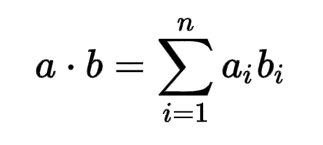

In [6]:
def dot(a, b):
    pass
    
# Test your solution
a = [-1, -2, 3]
b = [4, 0, -8]
dot(a, b)==-28

False

## Exercise 3.2
Implement a function `vec_len` that takes in an `n`-dimensional vector `a` and calculates its magnitude/length. Assume `a` is represented as a python list. If you want you can import `sqrt` function and use it in your solution; however, it is not necessary.

![](./resources/images/vector_length_formula.png)

In [7]:
def vec_len(a):
    pass

# Test your solution
a = [32,1,-42]
round(vec_len(a), 2) == 52.81 

TypeError: type NoneType doesn't define __round__ method

## Exercise 3.3

Implement a function `similarity` that takes in two `n`-dimensional vectors `a` and `b` and calculates the cosine similarity between these vectors. Assume `a` and `b` are represented as python lists. The best way to approach this is to use the functions `dot` and `vec_len` which you wrote in exercises 3.1 and 3.2.

In [8]:
def similarity(a, b):
    pass

## [Video Solutions](https://youtu.be/_hPyIxwU0ys) to Exercises 3.1-3.3

## Calculating similarity between two words

Now that we know how vector similarity works, we can use it to calculate similarity between two words or rather their numerical representations.

Let's say we want to answer 4 questions:
- Is 'cat' similar to 'dog'?
- Is 'cat' similar to 'lion'?
- Is 'cat' similar to 'pet'?
- Is 'cat' similar to 'milk'?

In [9]:
# Retrieve word representations from vocabulary
cat = nlp.vocab["cat"]
lion = nlp.vocab["lion"]
pet = nlp.vocab["pet"]
milk = nlp.vocab["milk"]
# Put them in a list
words = [cat, lion, pet, milk]
# Calculate similarity of each pairing
for word_1 in words:
    for word_2 in words:
        print(f"{word_1.text} is similar to {word_2.text} with {word_1.similarity(word_2)}")

cat is similar to cat with 1.0
cat is similar to lion with 0.5265437960624695
cat is similar to pet with 0.7505456805229187
cat is similar to milk with 0.30299440026283264
lion is similar to cat with 0.5265437960624695
lion is similar to lion with 1.0
lion is similar to pet with 0.39923766255378723
lion is similar to milk with 0.23199084401130676
pet is similar to cat with 0.7505456805229187
pet is similar to lion with 0.39923766255378723
pet is similar to pet with 1.0
pet is similar to milk with 0.27374202013015747
milk is similar to cat with 0.30299440026283264
milk is similar to lion with 0.23199084401130676
milk is similar to pet with 0.27374202013015747
milk is similar to milk with 1.0


Comparing identitical word vectors yields `1` as in example. What we can also observe is that "cat" is not really related to "milk" (only 0.3), but it is similar to "lion" to some extent (0.52) and to a "pet" (0.75).

## Exercise 3.4

Find how similar are the following pairs of words:

a. "brother" and "sister"

b. "strong" and "weak"

c. "cactus" and "piano"

Round the calculated similarity to 2 decimal places using round() function
Example usage:
round(number, decimal_places)
round(5.247, 2) = 5.25

In [10]:
# Write your code here

In [11]:
# Replace zeros with your answers
answer_a = 0.75
answer_b = 0.66
answer_c = 0.13

In [12]:
# DO NOT CHANGE THIS CELL
# RUN THIS CELL TO CHECK YOUR ANSWERS
%run resources/python/check_ex_2.py $answer_a $answer_b $answer_c

Correct! Well Done!


As you can see from this exercise: antonyms (words with opposite meaning) can also be quite similar, because they share some some semantic feature, eg. "short" and "tall" both relate to "height" category to some extent.

## Watch [Video Solution](https://youtu.be/_UW4ydw5gpA) for Exercise 3.4

#  Word Vector Arithmetic

Because words are stored as vectors, we can perform normal vector operations on them, for example vector addition, multiplication of a vector by a scalar and many many more.

Let's see what happened if we take the word "king", subtract "man" from it and add "woman". Can you guess what word can we acquire this way?

We will use **scipy** cosine to create a fast cosine_similarity function. We will then compute similarities between each word from the vocabulary that has a vector and our new_vector. We will show the most similar words to the new vector.

In [14]:
from scipy.spatial import distance

# Get word vectors
king = nlp.vocab["king"].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector

# Do vector arithmetic
new_vector = king - man + woman

# Create cosine similarity function
cosine_similarity = lambda v, w: 1 - distance.cosine(v,w)

# Create a list to store similarity values
similarities = []

# Compute similarities for every word in vocab
for word in nlp.vocab: # for all words in vocabulary
    if word.has_vector and word.is_lower and word.is_alpha: # because not all words have embeddings
        similarity = cosine_similarity(new_vector, word.vector)
        similarities.append((word, similarity))

# Sort and show the largest similarity scores
similarities = sorted(similarities, key=lambda item: -item[1])
print([word[0].text for word in similarities[:10]])

['king', 'woman', 'she', 'lion', 'who', 'when', 'dare', 'cat', 'was', 'not']


Are you suprised? I hope you were expecting 'queen' to show up, it's perfectly rational.
If we used larger, more accurate models like `en_core_web_lg` (770MB) the word 'queen' would probably show up in one of the first places. This experiment highlights the importance of the amount of data we need to use to understand word semantics. 

Feel free to play with the "word mathematics" and share your interesting word equations with your friends.

If you want to play with it more and have a decent hardware, I encourage you to download the large spacy model, load it and repeat this exercise. The results will be definitely much more accurate and closer to what we usually expect.

## Quiz 3

In [15]:
from jupyterquiz import display_quiz
display_quiz("resources/quizzes/questions3.json")

# [Next Chapter](4.%20Let's%20Learn%20NLP%20-%20Sentiment%20Analysis.ipynb)